# Classification (02)

In this lab we would be going through:
- Naive Bayes
- K-Nearest Neighbours
- Poisson Regression

For this lab, we would examining the `Smarket` data set that contains a number of numeric variables plus a variable called `Direction` which has the two labels `Up` and `Down`

Our goal is to predict `Direction` using the other features

In [51]:
library(e1071)
library(ISLR2)
attach(Smarket)

The following objects are masked from Smarket (pos = 6):

    Direction, Lag1, Lag2, Lag3, Lag4, Lag5, Today, Volume, Year




In [52]:
train <- (Year < 2005)

# Test data
Smarket.test <- Smarket[!train, ]
dim(Smarket.test)

#Train data
Smarket.train = Smarket[train, ]
dim(Smarket.train)

Direction.2005 = Direction[!train]

[1] 252   9

[1] 998   9

## Naive Bayes

We are using the `naiveBayes()` function, which is part of the e1071 naiveBayes() library. 

By default, this implementation of the naive Bayes classifier models each quantitative feature using a Gaussian distribution. However, a kernel density method can also be used to estimate the distributions.

In [53]:
nb.fit <- naiveBayes(Direction ~ Lag1 + Lag2, data = Smarket,
subset = train)
nb.fit


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    Down       Up 
0.491984 0.508016 

Conditional probabilities:
      Lag1
Y             [,1]     [,2]
  Down  0.04279022 1.227446
  Up   -0.03954635 1.231668

      Lag2
Y             [,1]     [,2]
  Down  0.03389409 1.239191
  Up   -0.03132544 1.220765


The output contains the estimated mean and standard deviation for each variable in each class.

In [54]:
mean(Lag1[train][Direction[train] == 'Down'])
sd(Lag1[train][Direction[train] == 'Down'])

[1] 0.04279022

[1] 1.227446

In [55]:
nb.class = predict(nb.fit, Smarket.test)
table(nb.class, Direction.2005)

mean(nb.class == Direction.2005)

        Direction.2005
nb.class Down  Up
    Down   28  20
    Up     83 121

[1] 0.5912698

`Naive Bayes` performs very well on this data, with accurate predictions over `59%` of the time. This is slightly worse than `QDA`, but much better than `LDA`.

The `predict()` function can also generate estimates of the probability that each observation belongs to a particular class

In [56]:
nb.preds = predict(nb.fit, Smarket.test, type = "raw")
nb.preds[1:5, ]

Down,Up
0.4873164,0.5126836
0.4762492,0.5237508
0.4653377,0.5346623
0.4748652,0.5251348
0.4901890,0.5098110


## K - Nearest Neighbors

We would be using the `knn()` function which is a part of the `class` library. Rather than a two-step approach in which we first fit the model and then we use the model to make predictions, `knn()` forms predictions using a single command.

The function requires four inputs:
1. A matrix containing the predictors associated with the training data, labeled `train.X` below.
2. A matrix containing the predictors associated with the data for which we wish to make predictions, labeled `test.X` below.
3. A vector containing the class labels for the training observations, labeled `train.Direction` below.
4. A value for `K`, the number of nearest neighbors to be used by the classifier.

In [57]:
library(class)

In [58]:
train.X = cbind(Lag1, Lag2)[train, ] #cbind() is short for column bind, binds variables together
test.X = cbind(Lag1, Lag2)[!train, ]
train.Direction = Direction[train]

We set a random `seed` before we apply `knn()` because if several observations are tied as nearest neighbors, then `R` will randomly break the tie.

In [59]:
set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k=1)

table(knn.pred, Direction.2005)
mean(knn.pred==Direction.2005) #performance

        Direction.2005
knn.pred Down Up
    Down   43 58
    Up     68 83

[1] 0.5

The results using `K = 1` are not very good, since only `50 %` of the observa- tions are correctly predicted. Of course, it may be that `K = 1` results in an overly flexible fit to the data.

In [100]:
knn.pred = function() {
    set.seed(4)
  knn(train.X, test.X, train.Direction, k = 109)
}

knn.pred = knn.pred()

table(knn.pred, Direction.2005)

mean(knn.pred == Direction.2005) 



        Direction.2005
knn.pred Down Up
    Down   47 51
    Up     64 90

[1] 0.5436508

In [101]:
table(knn.pred, Direction.2005)

#Test the performance of new model
stopifnot(round(mean(knn.pred == Direction.2005),2) == 0.54)

        Direction.2005
knn.pred Down Up
    Down   47 51
    Up     64 90

In [102]:
knn.pred = knn(train.X, test.X, train.Direction, k=4)
mean(knn.pred == Direction.2005)

[1] 0.531746

We can see that the results have improved slightly when we increase the value of `K` from `1` to `3`. But increasing `K` further turns out to provide no further improvements. 

It appears that for this data, QDA provides the best results of the methods that we have examined so far.

## Poisson Regression

We would be using the `glm()` function with the argument `family = poisson` to define a poisson regression model.

We are gonna fit a Poisson regression model to the `Bikeshare` data set found in `ISLR2` library, which measures the number of bike rentals(`bikers`) per hour in Washington DC.

In [63]:
attach(Bikeshare) #attaching the data set to R's context

The following objects are masked from Bikeshare (pos = 4):

    atemp, bikers, casual, day, holiday, hr, hum, mnth, registered,
    season, temp, weathersit, weekday, windspeed, workingday


The following objects are masked from Bikeshare (pos = 5):

    atemp, bikers, casual, day, holiday, hr, hum, mnth, registered,
    season, temp, weathersit, weekday, windspeed, workingday




In [64]:
dim(Bikeshare)
names(Bikeshare)

[1] 8645   15

[1] "season"     "mnth"       "day"        "hr"         "holiday"   
 [6] "weekday"    "workingday" "weathersit" "temp"       "atemp"     
[11] "hum"        "windspeed"  "casual"     "registered" "bikers"

In [65]:
mod.pois = glm(bikers ~ mnth + hr + workingday + temp + weathersit, 
               data = Bikeshare, family = poisson)
summary(mod.pois)


Call:
glm(formula = bikers ~ mnth + hr + workingday + temp + weathersit, 
    family = poisson, data = Bikeshare)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-20.7574   -3.3441   -0.6549    2.6999   21.9628  

Coefficients:
                           Estimate Std. Error  z value Pr(>|z|)    
(Intercept)                2.693688   0.009720  277.124  < 2e-16 ***
mnthFeb                    0.226046   0.006951   32.521  < 2e-16 ***
mnthMarch                  0.376437   0.006691   56.263  < 2e-16 ***
mnthApril                  0.691693   0.006987   98.996  < 2e-16 ***
mnthMay                    0.910641   0.007436  122.469  < 2e-16 ***
mnthJune                   0.893405   0.008242  108.402  < 2e-16 ***
mnthJuly                   0.773787   0.008806   87.874  < 2e-16 ***
mnthAug                    0.821341   0.008332   98.573  < 2e-16 ***
mnthSept                   0.903663   0.007621  118.578  < 2e-16 ***
mnthOct                    0.937743   0.006744  139.054 

We are gonna plot these coefficients associated with `mnth` and `hr` for better visualization

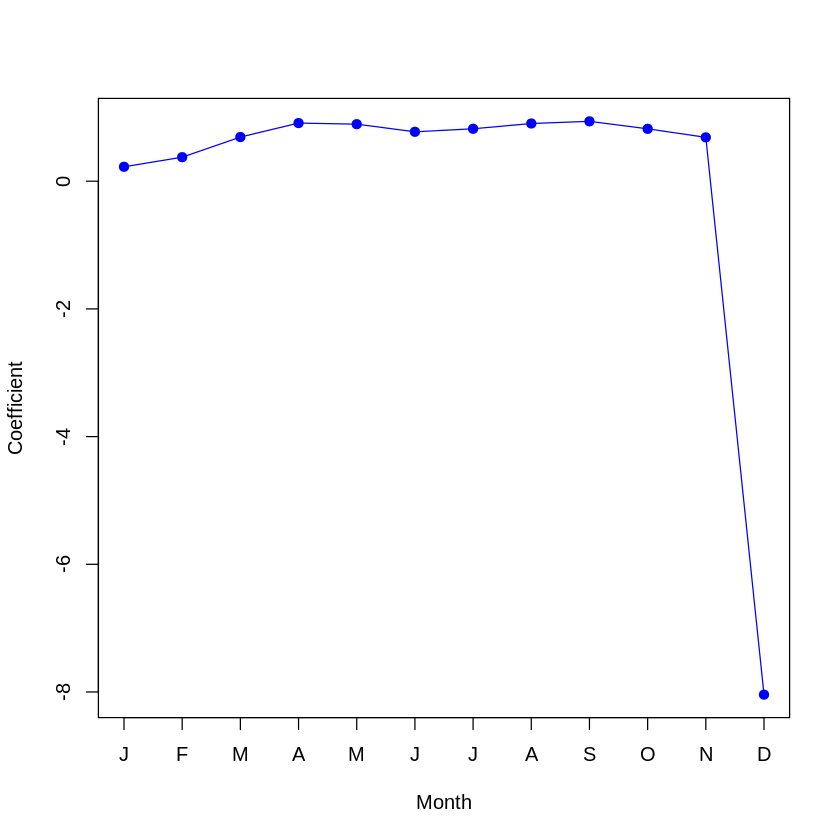

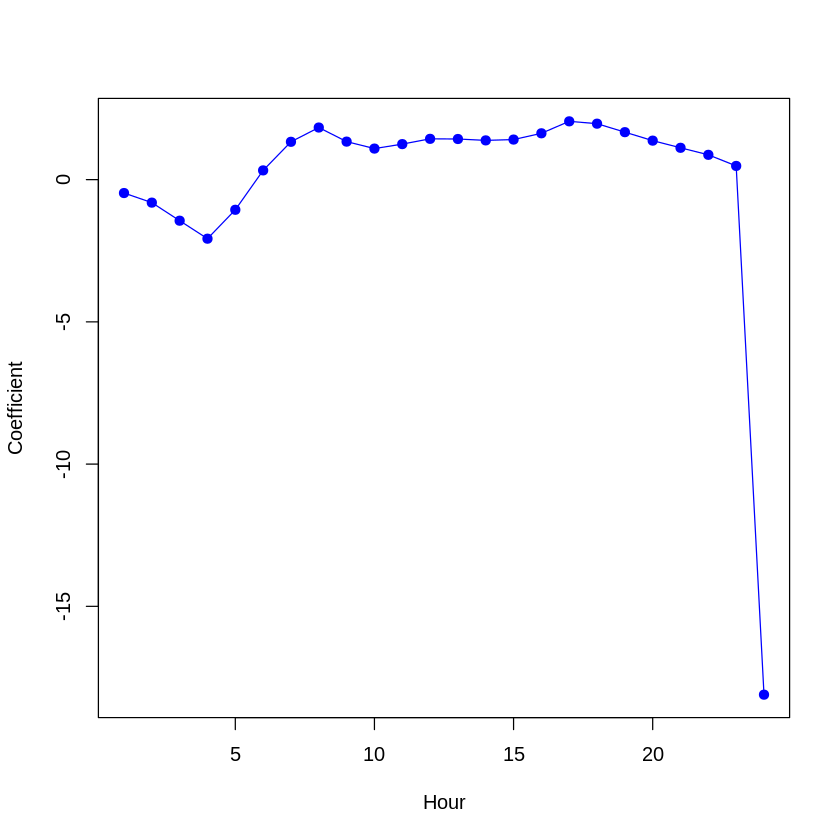

In [66]:
coef.mnth <- c(coef(mod.pois)[2:12], -sum(coef(mod.pois)[2:12]))


plot(coef.mnth, xlab = "Month", ylab = "Coefficient", 
     xaxt = "n", col = "blue", pch = 19, type = "o")
axis(side = 1, at = 1:12, 
     labels = c("J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"))

coef.hours <- c(coef(mod.pois)[13:35], -sum(coef(mod.pois)[13:35]))
plot(coef.hours, xlab = "Hour", ylab = "Coefficient", col = "blue", pch = 19, type = "o")

We can once again use the `predict()` function to obtain the fitted values (predictions) from this Poisson regression model.

In [67]:
mod.pred = predict(mod.pois, type = "response")
summary(mod.pred)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.201  44.513 124.299 143.794 219.268 585.958 